# Logistic Regression


## 1. Importing Libraries, Data Cleaning & Pre-processing

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings('ignore')


#### Importing the dataset by reading it from a CSV file.

In [35]:
df = pd.read_csv('earthquake_data.csv')

#### we will summarize the dataset's. Output varies depending on numeric data or categorical data type. In case of numeric data:- count, mean, std, min, max, 75th, 50th ,25th percentiles is displayed In case of categorical data:- count, unique, top, freq, first and last items

In [36]:
df.describe(include = 'all')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
count,5479,5479.000000,5479.000000,5479.000000,5479.000000,5479,4875.000000,5028.000000,5027.000000,5479.000000,...,5479,5479,5479,4981.000000,5479.000000,5013.000000,5024.000000,5479,5479,5479
unique,5477,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,...,5479,1171,4,NaN,NaN,NaN,NaN,2,13,14
top,2018-07-19T22:38:58.290Z,NaN,NaN,NaN,NaN,ml,NaN,NaN,NaN,NaN,...,2018-07-22T16:44:45.780Z,"4km WSW of Volcano, Hawaii",earthquake,NaN,NaN,NaN,NaN,automatic,hv,hv
freq,2,NaN,NaN,NaN,NaN,4860,NaN,NaN,NaN,NaN,...,1,688,5439,NaN,NaN,NaN,NaN,4614,4380,4380
mean,NaN,24.145829,-147.086426,6.558106,2.312119,NaN,20.886154,89.912665,0.108372,0.235240,...,NaN,NaN,NaN,0.645904,0.893382,0.684618,16.473527,NaN,NaN,NaN
std,NaN,13.046497,33.293635,24.190602,0.638113,NaN,11.010084,59.753048,0.883814,0.168817,...,NaN,NaN,NaN,1.533695,2.973400,0.903529,20.811816,NaN,NaN,NaN
min,NaN,-61.394800,-179.702900,-3.390000,0.950000,NaN,2.000000,11.000000,0.000140,0.010000,...,NaN,NaN,NaN,0.100000,0.000000,0.000000,1.000000,NaN,NaN,NaN
25%,NaN,19.401167,-155.281006,0.350000,1.940000,NaN,13.000000,47.750000,0.004684,0.140000,...,NaN,NaN,NaN,0.220000,0.200000,0.240000,9.000000,NaN,NaN,NaN
50%,NaN,19.412500,-155.271668,0.870000,2.300000,NaN,19.000000,69.000000,0.007603,0.190000,...,NaN,NaN,NaN,0.280000,0.280000,0.330000,13.000000,NaN,NaN,NaN
75%,NaN,19.427000,-155.258667,1.820000,2.650000,NaN,26.000000,114.000000,0.011615,0.270000,...,NaN,NaN,NaN,0.440000,0.480000,0.440000,19.000000,NaN,NaN,NaN


#### Lets check for null values

In [37]:
df.isnull().sum().sum()

2926

#### From the above result we can observe that we have 2926 null value. And we have to handle these values to get accurate results

Missing values need to be handled because,
1. They reduce the quality for any of our performance metric 
2. It can also lead to wrong prediction or classification
3. They cause a high bias for any given model being used

There are three popular methods to handle missing data:
1. Drop missing values
2. Fill missing values with test statistic
3. Predict missing values with a machine algorithms

#### Now lets find total number of missing values in each columns. Also I will caluclate the percentage of missing values in each columns.

In [38]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
nst,604,11.02
horizontalError,498,9.09
magError,466,8.51
magNst,455,8.30
dmin,452,8.25
gap,451,8.23


#### From the above results we can infer that only columns with numeric values , data is missing. In this scenario, we can replace the null values with mean of respective columns. In another where we have missing categorical values, we have to replace with mode of the column.

#### lets fill mean in place of NaN

In [39]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum().sum()

0

#### We can observe from above result there are no more null values. Hence null values are handled successfully!

#### Lets remove unwanted columns from dataFrame which we know will not impact the magnitude.


In [40]:
df= df.drop(['id','updated','place','net','time','magSource','locationSource'], axis =1)
df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,type,horizontalError,depthError,magError,magNst,status
0,19.390833,-155.264328,-0.71,2.37,md,16.0,103.0,0.007544,0.34,earthquake,0.34,0.38,0.39,7.0,automatic
1,19.424166,-155.255005,0.37,2.43,ml,13.0,146.0,0.005713,0.10,earthquake,0.22,0.15,0.42,19.0,automatic
2,19.398666,-155.290161,0.79,2.40,ml,11.0,76.0,0.012210,0.17,earthquake,0.51,0.43,0.42,22.0,automatic
3,46.848167,-121.755837,0.49,1.33,md,8.0,93.0,0.020080,0.03,earthquake,0.39,1.05,0.15,5.0,automatic
4,19.411501,-155.274002,1.05,2.13,ml,31.0,40.0,0.011330,0.27,earthquake,0.26,0.20,0.33,15.0,automatic


## 2. Target Variable = Magnitude

#### Now lets study more about our target variable ,magnitude
Lets stary by plotting box plot

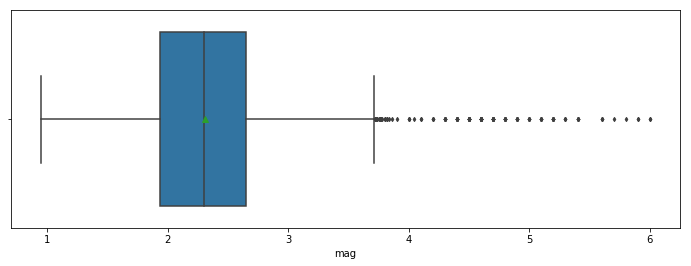

In [41]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'mag', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

There are lot of outliers above 3.7.
The range of value are between 1.8 to 2.6 as defined by interquartile range.
The distribution is even.

#### Target variable is a continious value. Now we will chnage the target variable to fit logistic regression.

In [42]:
df['mag'].describe()

count    5479.000000
mean        2.312119
std         0.638113
min         0.950000
25%         1.940000
50%         2.300000
75%         2.650000
max         6.000000
Name: mag, dtype: float64

#### To do so we will manupulate the above value to binary by considering values above mean as 1 and otherwise 0

In [43]:
df['mag']=np.where(df['mag']>=df['mag'].mean(),1,0)

#count_plot
df['mag'].value_counts()


0    2824
1    2655
Name: mag, dtype: int64

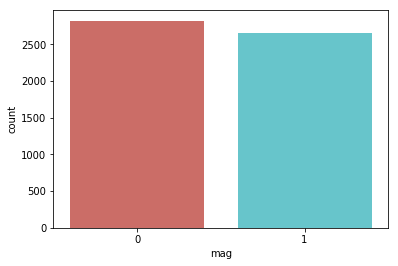

In [44]:
sns.countplot(x='mag', data = df, palette ='hls')

In [45]:
df['magType'].value_counts()

ml       4860
md        486
mb         91
mb_lg      20
mww        17
mw          4
mwr         1
Name: magType, dtype: int64

In [46]:
df['magType']=np.where(df['magType'].isin(['mb','mb_lg','mww','mw','mwr']),"Others",df['magType'])

In [47]:
df['magType'].value_counts()

ml        4860
md         486
Others     133
Name: magType, dtype: int64

In [48]:
df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,type,horizontalError,depthError,magError,magNst,status
0,19.390833,-155.264328,-0.71,1,md,16.0,103.0,0.007544,0.34,earthquake,0.34,0.38,0.39,7.0,automatic
1,19.424166,-155.255005,0.37,1,ml,13.0,146.0,0.005713,0.10,earthquake,0.22,0.15,0.42,19.0,automatic
2,19.398666,-155.290161,0.79,1,ml,11.0,76.0,0.012210,0.17,earthquake,0.51,0.43,0.42,22.0,automatic
3,46.848167,-121.755837,0.49,0,md,8.0,93.0,0.020080,0.03,earthquake,0.39,1.05,0.15,5.0,automatic
4,19.411501,-155.274002,1.05,0,ml,31.0,40.0,0.011330,0.27,earthquake,0.26,0.20,0.33,15.0,automatic


Assumptions for Logistic Regresion:
First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

Finally, logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model.

## 3. Logistic Regression

#### Here we will consider multiple independent to generate logistic models.

#### We will implement Backward elimination (or backward deletion) process. All the independent variables are entered into the equation first and each one is deleted one at a time if they do not contribute to the regression equation. Stepwise selection is considered a variation of the previous two methods.

In [49]:
X = df[['latitude','longitude','depth','magType','nst','gap','dmin','rms','type','horizontalError','depthError','magError','magNst','status']]
X= pd.get_dummies(X,drop_first = True)

In [16]:
X.head()

,latitude,longitude,depth,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,magType_md,magType_ml,type_explosion,type_quarry blast,type_volcanic eruption,status_reviewed
0,19.390833,-155.264328,-0.71,16.0,103.0,0.007544,0.34,0.34,0.38,0.39,7.0,1,0,0,0,0,0
1,19.424166,-155.255005,0.37,13.0,146.0,0.005713,0.10,0.22,0.15,0.42,19.0,0,1,0,0,0,0
2,19.398666,-155.290161,0.79,11.0,76.0,0.012210,0.17,0.51,0.43,0.42,22.0,0,1,0,0,0,0
3,46.848167,-121.755837,0.49,8.0,93.0,0.020080,0.03,0.39,1.05,0.15,5.0,1,0,0,0,0,0
4,19.411501,-155.274002,1.05,31.0,40.0,0.011330,0.27,0.26,0.20,0.33,15.0,0,1,0,0,0,0


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 17 columns):
latitude                  5479 non-null float64
longitude                 5479 non-null float64
depth                     5479 non-null float64
nst                       5479 non-null float64
gap                       5479 non-null float64
dmin                      5479 non-null float64
rms                       5479 non-null float64
horizontalError           5479 non-null float64
depthError                5479 non-null float64
magError                  5479 non-null float64
magNst                    5479 non-null float64
magType_md                5479 non-null uint8
magType_ml                5479 non-null uint8
type_explosion            5479 non-null uint8
type_quarry blast         5479 non-null uint8
type_volcanic eruption    5479 non-null uint8
status_reviewed           5479 non-null uint8
dtypes: float64(11), uint8(6)
memory usage: 503.0 KB


In [18]:
# function to carry out multiple regression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
import statsmodels.api as sm
def logreg_model(X,y):

    """ This function is used to generate logistic model.Inputs X: independent values
    y: target value. 
    Outputs: It will generate model along with confusion_matrix.Plotting ROC curve.
    """
    logit=sm.Logit(y,X)
    result=logit.fit(method='bfgs')
    print(result.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
    print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))
    
    con_matrix = confusion_matrix(y_test,y_pred)
    print("Confusion matrix:")
    print(con_matrix)

    # plotting a roc curve to get the auc
    
    falsepos,truepos,thresholds = roc_curve(y_test,logreg.decision_function(X_test))  # to predict confidence scores for samples

    plt.plot(falsepos,truepos,label="ROC")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    cutoff = np.argmin(np.abs(thresholds))
    plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
    plt.show()




    logistic_auc = metrics.auc(falsepos, truepos)
    print("AUC for logistic regression model :", logistic_auc)




## Model 1

         Current function value: 0.462988
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                    mag   No. Observations:                 5479
Model:                          Logit   Df Residuals:                     5462
Method:                           MLE   Df Model:                           16
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.3316
Time:                        21:34:01   Log-Likelihood:                -2536.7
converged:                      False   LL-Null:                       -3795.1
                                        LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
latitude                  -0.1375      0.008    -17.

C:\Users\prafu\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


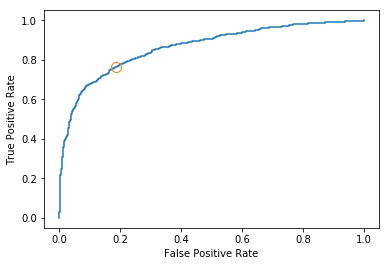

AUC for logistic regression model : 0.8639667350024307


In [19]:
y = df['mag']
logreg_model(X,y)

* Is the relationship significant? 
 Yes
* Are any model assumptions violated?      
 NO its in compliance with all 4
* Does the model make sense?  Interpret the meaning of each independent variable.
Yes. 
Here the terms that we are removing are based on z score and p value which is less than 0.05. 
the variables are independent of each other but contribute to the target variable.
* Cross-validate the model. How well did it do?


* Calculate the probability of getting the dependent variable
From confusion maxtrix generated for every model we will sum true positives and negatives divided by total number of values

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,9.2,latitude
1,47.7,longitude
2,1.5,depth
3,9.7,nst
4,6.9,gap
5,1.7,dmin
6,5.8,rms
7,3.6,horizontalError
8,2.9,depthError
9,2.1,magError


VIF is being performed now as a validation factor. We see that longitude and magType_ml lie above the range.There is a VIF much above 10 or a very high value, then multi co linearity exists and one of the linear model assusmptions is violated.

We have to eliminate one of the columns.Hence we will eliminate magType_ml

Other VIF factor which is well wihin the range, the multi- collinearity is taken care.
So the linear model assumption is satisfied.

* Is there any multi-colinearity in the model?   
Yes.
* In the multiple regression models are predictor variables independent of all the other predictor variables?
Not all the variable. magType_ml and longitude has high VIF score hence showing signs of correlation with eachother.
* In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.
'latitude','longitude','depth','nst','gap','dmin','rms','horizontalError','depthError','magError','magType_md','status_reviewed

* Cross-validate the models. How well did they do?
They did not have impact on the model.

##  Model 2

In [21]:
X = X[['latitude','longitude','depth','nst','gap','dmin','rms','horizontalError','depthError','magError','magType_md','status_reviewed']]


#X = X[['latitude','longitude','depth','nst','gap','dmin','rms','horizontalError','depthError','magError','magType_md','type_explosion','type_quarry blast','status_reviewed']]




         Current function value: 0.513173
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                    mag   No. Observations:                 5479
Model:                          Logit   Df Residuals:                     5467
Method:                           MLE   Df Model:                           11
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.2591
Time:                        21:34:02   Log-Likelihood:                -2811.7
converged:                      False   LL-Null:                       -3795.1
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
latitude           -0.1210      0.007    -16.967      0.000      -

C:\Users\prafu\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


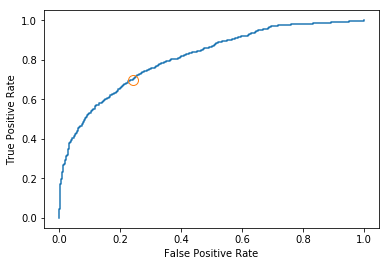

AUC for logistic regression model : 0.8121990488494171


In [22]:
logreg_model(X,y)

* Is the relationship significant? 
 Yes
* Are any model assumptions violated?      
 NO its in compliance with all 4
* Does the model make sense?  Interpret the meaning of each independent variable.
Yes. 
Here the terms that we are removing are based on z score and p value which is less than 0.05. 
the variables are independent of each other but contribute to the target variable.
* Cross-validate the model. How well did it do?


* Calculate the probability of getting the dependent variable
From confusion maxtrix generated for every model we will sum true positives and negatives divided by total number of values

Looking at the Z score, We can eliminate longitude as it is with least score. The value is not significant.

Removing longitude

## Model 3

In [23]:
X = X[['latitude','depth','nst','gap','dmin','rms','horizontalError','depthError','magError','magType_md','status_reviewed']]

         Current function value: 0.510195
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
                           Logit Regression Results                           
Dep. Variable:                    mag   No. Observations:                 5479
Model:                          Logit   Df Residuals:                     5468
Method:                           MLE   Df Model:                           10
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.2634
Time:                        21:34:03   Log-Likelihood:                -2795.4
converged:                      False   LL-Null:                       -3795.1
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
latitude           -0.1392      0.006    -21.845      0.000      -

C:\Users\prafu\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


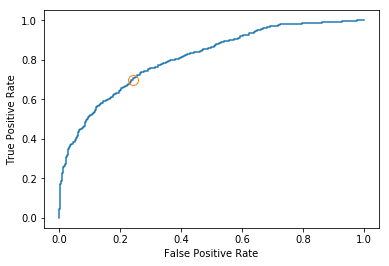

AUC for logistic regression model : 0.8095409412495781


In [24]:
logreg_model(X,y)

* Is the relationship significant? 
 Yes
* Are any model assumptions violated?      
 NO its in compliance with all 4
* Does the model make sense?  Interpret the meaning of each independent variable.
Yes. 
Here the terms that we are removing are based on z score and p value which is less than 0.05. 
the variables are independent of each other but contribute to the target variable.
* Cross-validate the model. How well did it do?


* Calculate the probability of getting the dependent variable
From confusion maxtrix generated for every model we will sum true positives and negatives divided by total number of values

Looking at the Z score, We can eliminate depth as it is with least score. The value is not significant.

Removing depth

## Model 4

In [25]:
X = X[['latitude','nst','gap','dmin','rms','horizontalError','depthError','magError','magType_md','status_reviewed']]

         Current function value: 0.510260
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                    mag   No. Observations:                 5479
Model:                          Logit   Df Residuals:                     5469
Method:                           MLE   Df Model:                            9
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.2633
Time:                        21:34:03   Log-Likelihood:                -2795.7
converged:                      False   LL-Null:                       -3795.1
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
latitude           -0.1321      0.006    -22.190      0.000      -

C:\Users\prafu\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


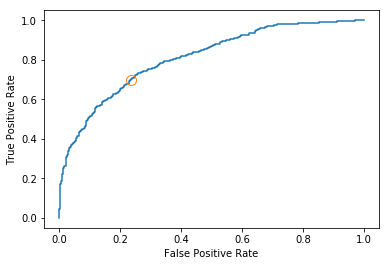

AUC for logistic regression model : 0.8104031909184297


In [26]:
logreg_model(X,y)

Looking at the Z score, We can eliminate gap as it is with least score. The value is not significant.

Removing gap

## Model 4

In [27]:
X = X[['latitude','nst','dmin','rms','horizontalError','depthError','magError','magType_md','status_reviewed']]

         Current function value: 0.507711
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                    mag   No. Observations:                 5479
Model:                          Logit   Df Residuals:                     5470
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.2670
Time:                        21:34:03   Log-Likelihood:                -2781.7
converged:                      False   LL-Null:                       -3795.1
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
latitude           -0.1318      0.005    -25.118      0.000      -

C:\Users\prafu\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


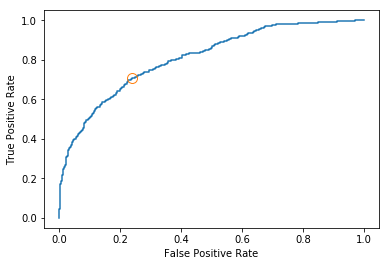

AUC for logistic regression model : 0.8095141817770966


In [28]:
logreg_model(X,y)

Looking at the Z score, We can eliminate horizontalError as it is with least score. The value is not significant.

Removing horizontalError

## Model 5

In [29]:
X = X[['latitude','nst','dmin','rms','depthError','magError','magType_md','status_reviewed']]

         Current function value: 0.507532
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                    mag   No. Observations:                 5479
Model:                          Logit   Df Residuals:                     5471
Method:                           MLE   Df Model:                            7
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.2673
Time:                        21:34:04   Log-Likelihood:                -2780.8
converged:                      False   LL-Null:                       -3795.1
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
latitude           -0.1294      0.005    -25.068      0.000      -

C:\Users\prafu\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


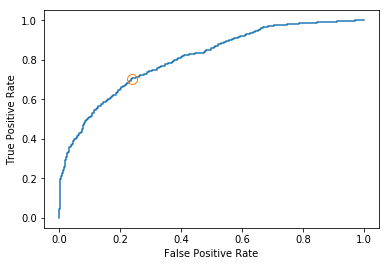

AUC for logistic regression model : 0.807745083318591


In [30]:
logreg_model(X,y)

Looking at the Z score, We can eliminate status_reviewed as it is with least score. The value is not significant.

Removing status_reviewed

## Model 6

In [31]:
X = X[['latitude','nst','dmin','rms','depthError','magError','magType_md']]

         Current function value: 0.507786
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                    mag   No. Observations:                 5479
Model:                          Logit   Df Residuals:                     5472
Method:                           MLE   Df Model:                            6
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.2669
Time:                        21:34:04   Log-Likelihood:                -2782.2
converged:                      False   LL-Null:                       -3795.1
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
latitude      -0.1284      0.005    -25.799      0.000      -0.138      -0.1

C:\Users\prafu\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


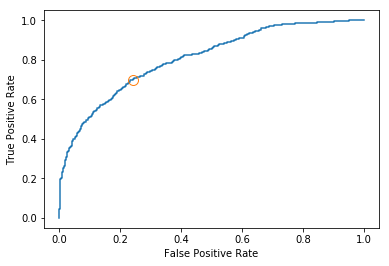

AUC for logistic regression model : 0.8071875943085576


In [32]:
logreg_model(X,y)